# TP 1: definition of functions and derivatives, level curves, Taylor's theorem, quadratic functions

In this TP we first define the test functions and their derivatives for the following TPs. The test functions we are going to use are the Rosenbrock (https://en.wikipedia.org/wiki/Rosenbrock_function) and the Rastrigin (https://en.wikipedia.org/wiki/Rastrigin_function) functions.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import math
#%matplotlib inline  
#%matplotlib notebook
#%pylab

# The Rosenbrock function

Rosenbrock function: 
$$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$$

It has a global minimum at $(x,y)=(a,a^{2})$, where $f(x,y)=0$.

Code the function and its derivatives (gradient and Hessian, the analytical expression). Chose as parameters $a=1,b=10$.

In [35]:
def rosenbrock(x,y, a=1,b=10):
  """Compute the Rosenbrock function"""
  return np.power(x - a, 2) + b * np.power(y - x*x, 2)

def grad_rosenbrock(t, a=1,b=10):
  """Computation of the analytical form of the gradient of the Rosenbrock function"""
  x, y = t
  return np.array([
    2 * (x - a) - 4 * b * x * (y - x**2),
    2 * b * (y - x**2)
  ])

def hess_rosenbrock(t, a=1,b=10):
  """Computation of the analytical form of the Hessian of the Rosenbrock function"""
  x = t[0]
  y = t[1]
  h = np.zeros((2,2))
  h[0][0] = 2-4*b*(y-3*x**2)
  h[0][1] = -4*b*x
  h[1][0] = -4*b*x
  h[1][1] = 2*b
  return h

Draw the plot of the surface of $f$ 

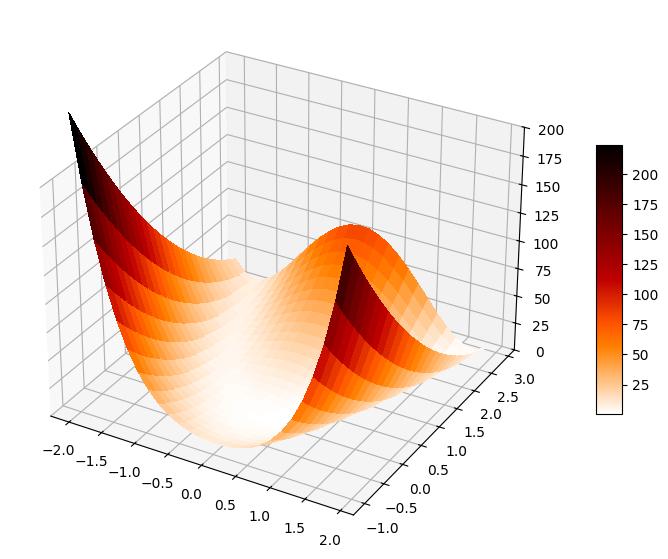

In [36]:
# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.add_subplot(111, projection='3d')

# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X,Y)

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Consider a starting point $x_0=[-1.4,1.1]$ and the global optimum $x^*=[1,1]$. Draw the level curves of $f$ and mark the two points on the plot

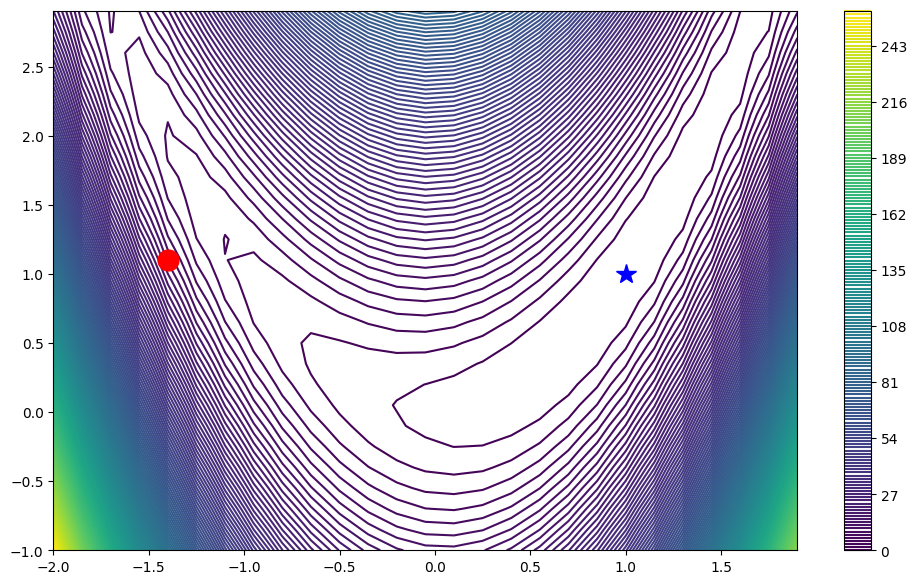

In [37]:
x0 = np.array([-1.4,1.1])
xstar = np.array([1,1])

# Initialize figure 
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')
plt.plot([xstar[0]],[xstar[1]],marker='*',markersize=15, color ='b')
plt.colorbar()

Compute the negative direction of the gradient in $x_0$ ($-\nabla f(x_0)$) and plot it 

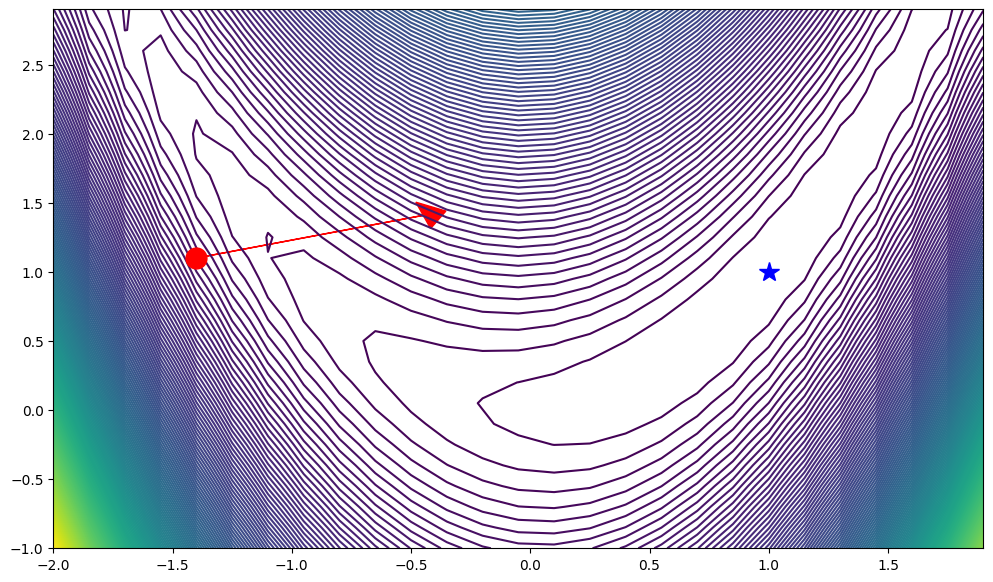

In [38]:
s = - grad_rosenbrock(x0)

# Initialize figure 
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
ns = np.sqrt(s[0]**2+s[1]**2);
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')
plt.arrow(x0[0],x0[1],s[0]/ns,s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')
plt.plot([xstar[0]],[xstar[1]],marker='*',markersize=15, color ='b')


How far can we go in this direction to keep the function decreasing?

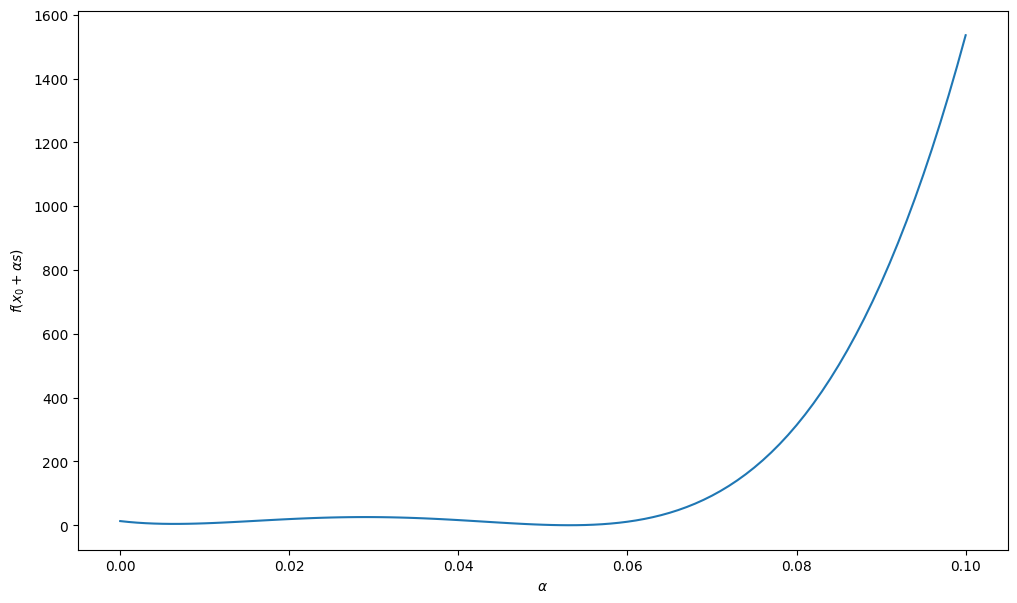

In [39]:
from numpy.core.fromnumeric import reshape

F = lambda X: rosenbrock(X[0],X[1])
al = np.linspace(0,0.1,101)
z = [F(x0+a*s) for a in al]

figLS = plt.figure(figsize=(12, 7))

plt.plot(al,z)
plt.ylabel('$f(x_0+ \\alpha s)$')
plt.xlabel('$\\alpha$')
plt.show()

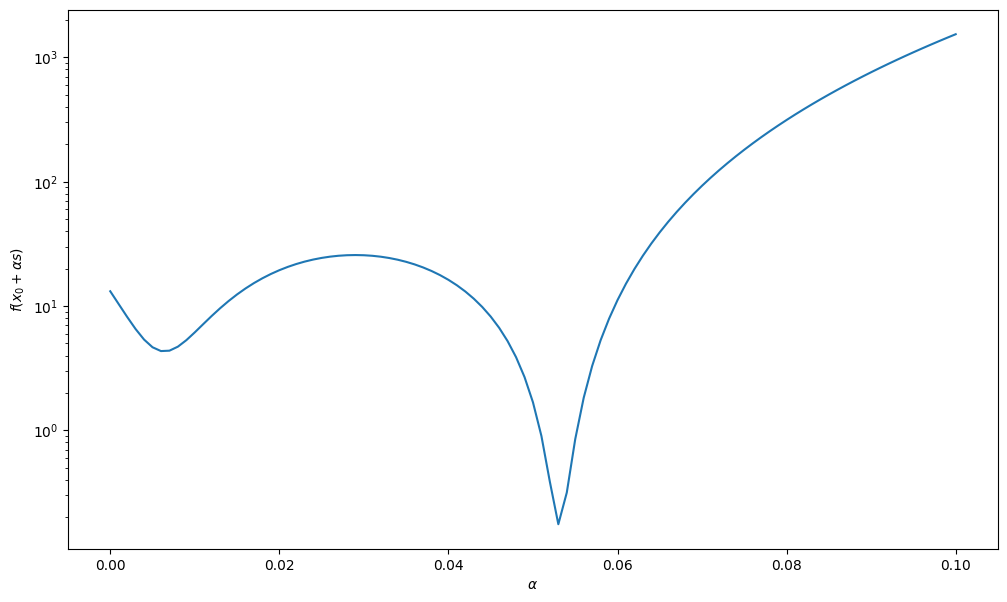

In [40]:
figLS = plt.figure(figsize=(12, 7))
plt.plot(al,z)
plt.yscale('log')
plt.ylabel('$f(x_0+ \\alpha s)$')
plt.xlabel('$\\alpha$')
plt.show()

# The Rastrigin function

The $n$-dimensional Rastrigin function is defined by:

$$ 
f(x )=A n+\sum _{i=1}^{n}\left[x_{i}^{2}-A\cos(2\pi x_{i})\right]
$$

where $A=10$ and $x_{i}\in [-5.12,5.12]$. It has a global minimum at $x =0$  where $f(x )=0$.

We consider here $n=2$. Implement the code defining the function, the gradient and the Hessian.

In [41]:
def rastrigin(x, a=10, n=2):
  """Compute the Rastrigin function"""
  return a * n + np.sum([
    x[i]*x[i] - a * np.cos(2 * np.pi * x[i])
    for i in range(n)
  ])

def grad_rastrigin(x, a=10, n=2):
  """Computation of the analytical form of the gradient of the Rastrigin function"""
  return np.array([
    2 * x[i] + 2 * a * np.pi * np.sin(2 * np.pi * x[i])
    for i in range(n)
  ])

def hess_rastrigin(x, a=10):
  """Computation of the analytical form of the Hessian of the Rastrigin function"""
  h = np.zeros((2,2))
  h[0][0] = 2+a*4*np.pi**2*np.cos(2*np.pi*x[0])
  h[1][1] = 2+a*4*np.pi**2*np.cos(2*np.pi*x[1])
  return h

Plot the surface of the function

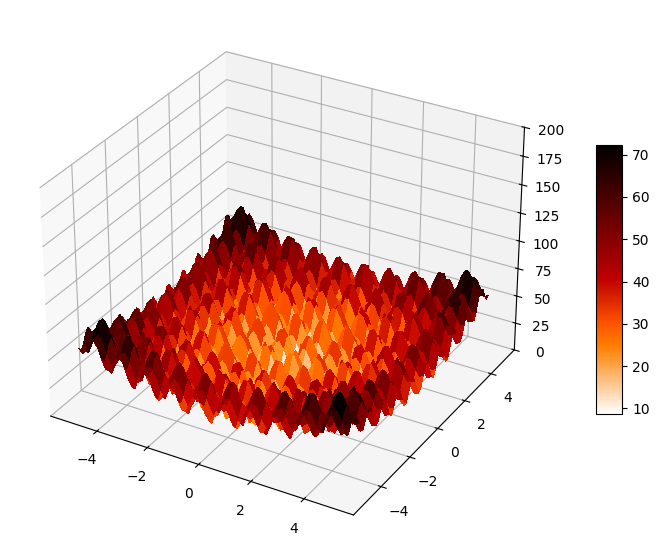

In [42]:
# Initialize figure 
figRas = plt.figure(figsize=(12, 7))
axRas = figRas.add_subplot(111, projection='3d')

# Evaluate function
X = np.arange(-5.12, 5.12, 0.15)
Y = np.arange(-5.12, 5.12, 0.15)
X, Y = np.meshgrid(X, Y)
Z = np.array([[rastrigin([x, y]) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Plot the surface
surf = axRas.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRas.set_zlim(0, 200)
figRas.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Plot the level curves and the minimum

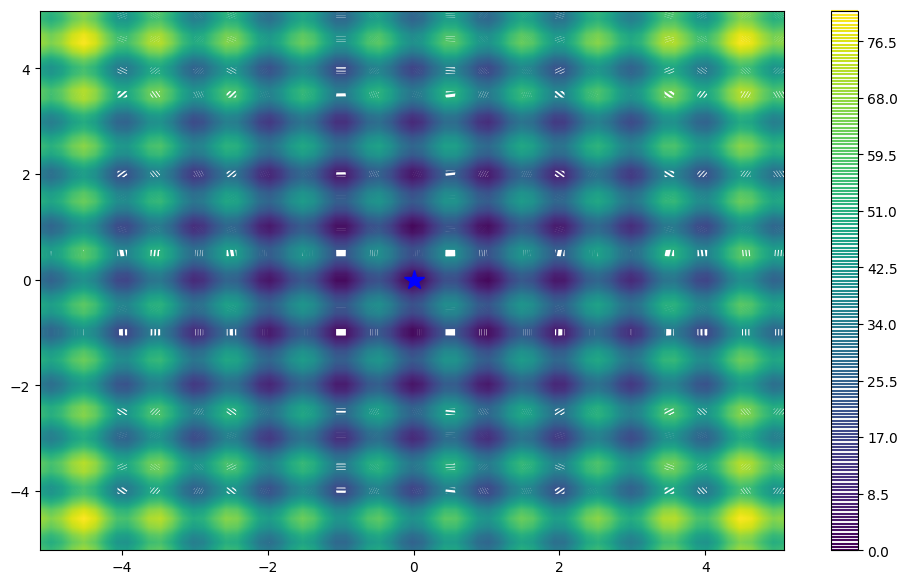

In [43]:
xstar = np.array([0,0])

# Initialize figure 
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([xstar[0]],[xstar[1]],marker='*',markersize=15, color ='b')
plt.colorbar()

# Taylor's theorem

In this part we study the approximation of a function by the Taylor's model. 

Build a python function that, given a function $f$, gives as an output the generic Taylor's model of order $q$ cenetered in $x_0$ and computed in $x$

In [32]:
def taylor(x,x0,f,q):
  # f is a (q+1) dimensional vector containing the values of the derivatives of f in x0 up to order q 
  # COMPLETE
  return np.sum([
    np.power(x - x0, i) * f[i] / math.factorial(i)
    for i in range(q+1)
  ])

Consider the function $f(x)=\frac{1}{1+x^2}$ and study how the quality of the approximation of this function by the Taylor's model varies with the order $q$, for $q=0,1,2,3,4$: plot the function and the Taylor's models for the different values of $q$

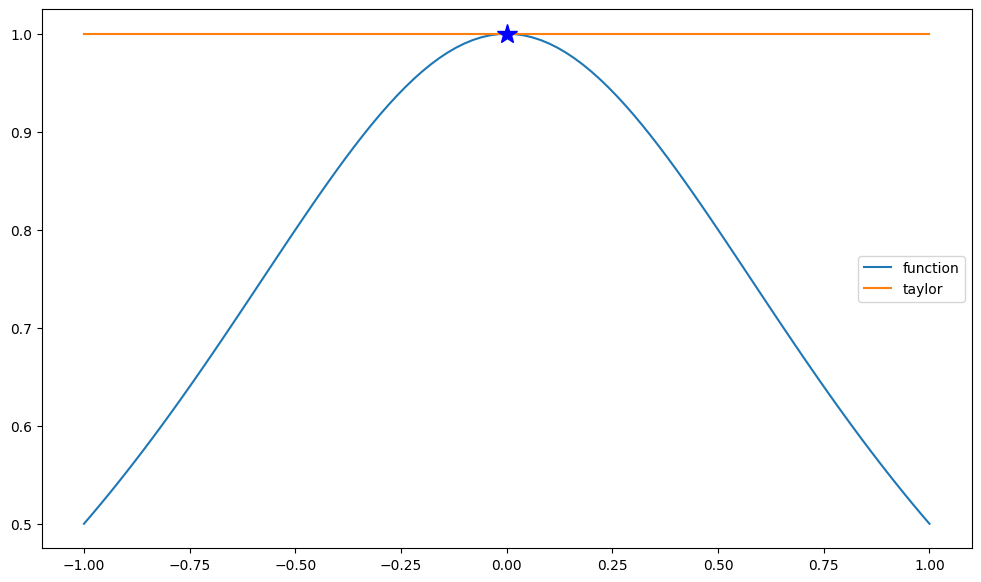

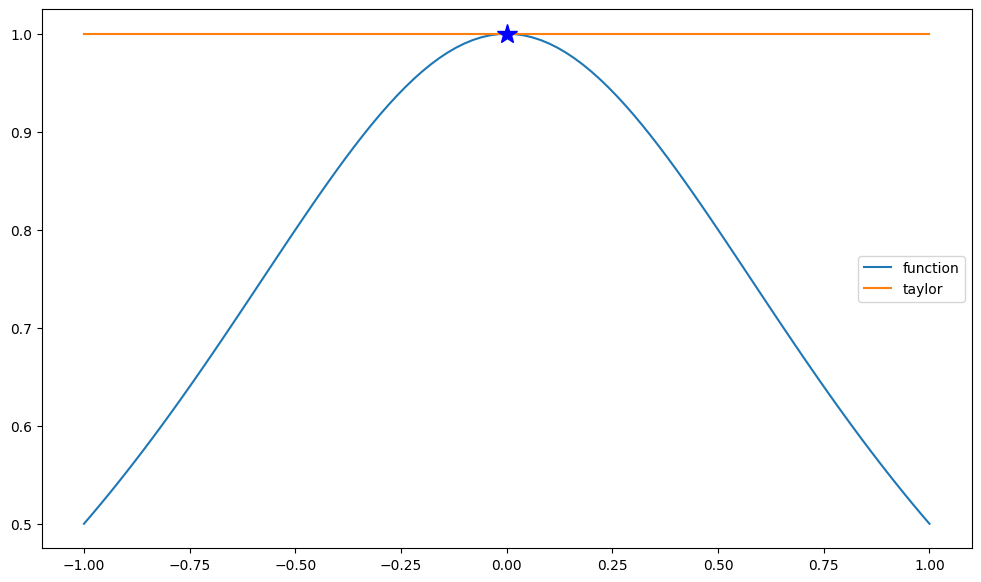

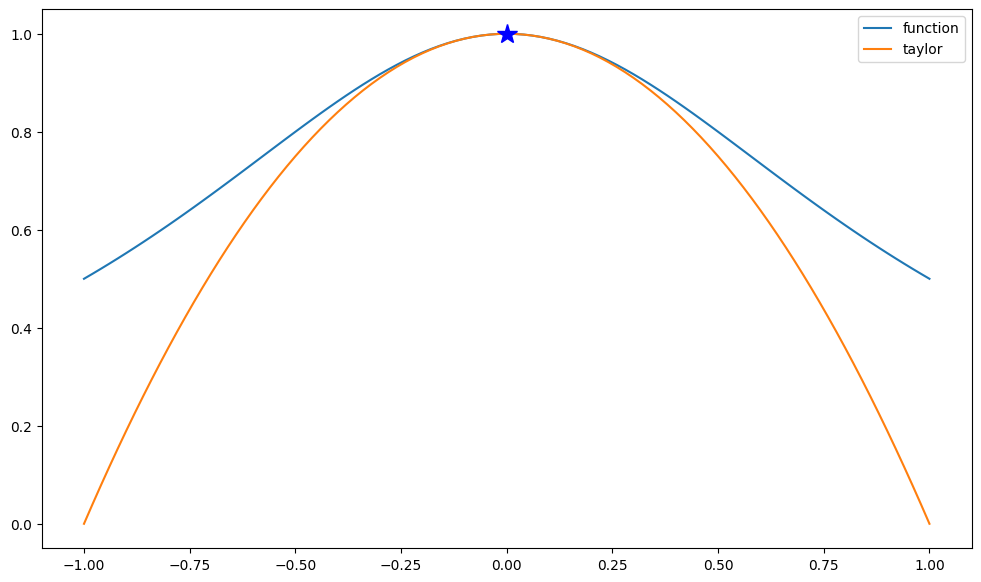

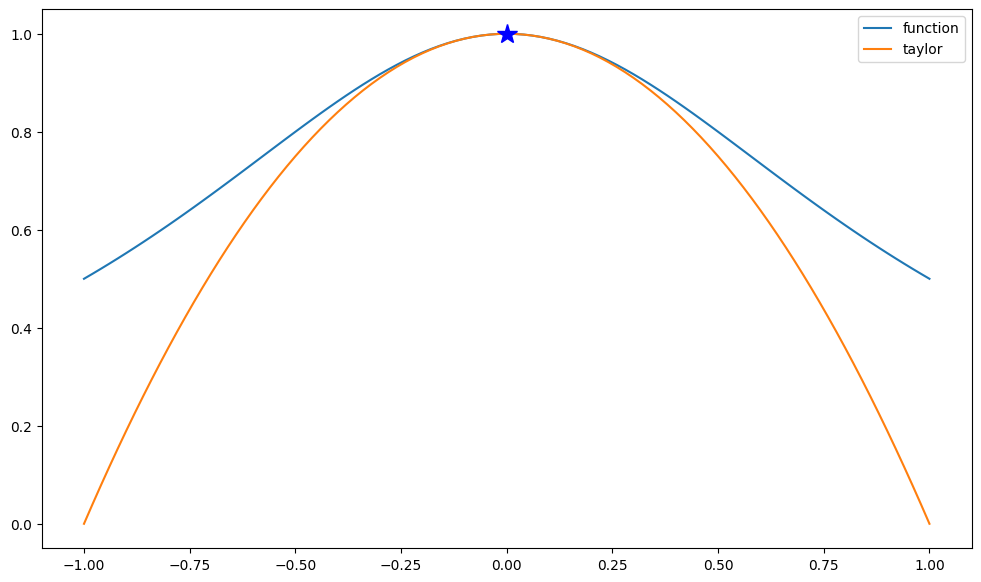

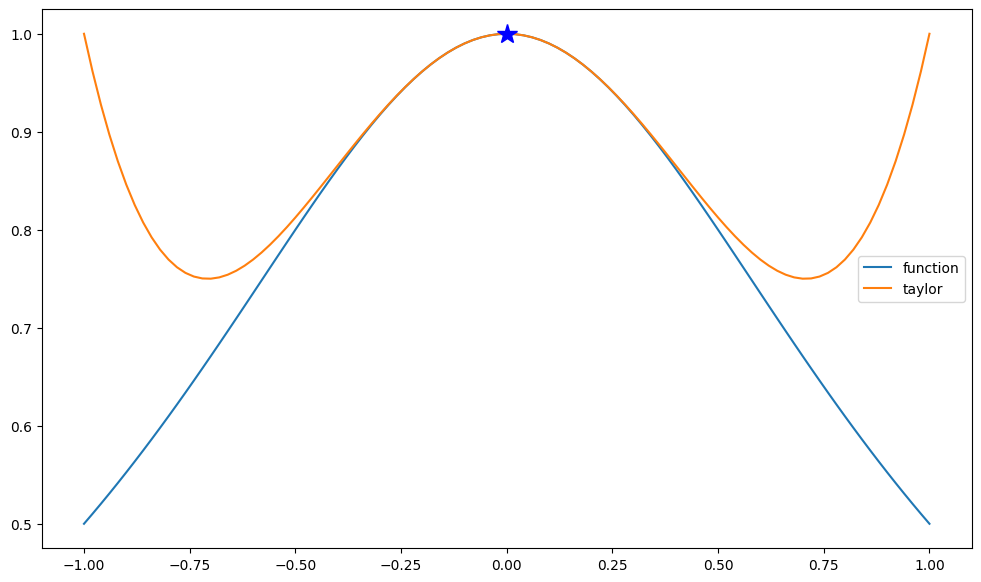

In [44]:
def f(x,q):
  if q==0:
    return 1/(1+x**2)
  elif q==1:
    return -(2*x)/(1+x**2)**2
  elif q==2:
    return (6*x**2-2)/(1+x**2)**3
  elif q==3:
    return (12*x*(1+x**2)**2-6*x*(6*x**2-2))/(1+x**2)**5
  elif q==4:
    a=12*x*(1+x**2)**2
    b=6*x*(6*x**2-2)
    ap=12*(1+x**2)**2+48*x**2*(1+x**2)
    bp=108*x**2-12
    c=(1+x**2)**5
    cp=10*x*(1+x**2)
    return ((ap-bp)*c-(a-b)*cp)/c**2


x0=0


for q in range(5):
  fvec=[f(x0,i) for i in range(q+1)]
  al=np.linspace(x0-1,x0+1,101)
  fig = plt.figure(figsize=(12, 7))
  fval = [f(a,0) for a in al]
  tval= [taylor(a,x0,fvec,q) for a in al]
  plt.plot(al,fval,label="function")
  plt.plot(al,tval,label="taylor")
  plt.plot(x0,fvec[0],marker='*',markersize=15, color ='b')
  plt.legend()
  plt.show()




# Quadratic functions

In this section we study two different quadratic functions, defined by the matrices $A$ and $B$. 

Write the functions defining the quadratic forms and their derivatives. What are the stationary points for these functions?

In [49]:

A=np.array([[1,2],[2,1]])
B=np.array([[2,-1],[-1,2]])

q1=lambda x: x.T @ A @ x / 2
q2=lambda x: x.T @ B @ x / 2

def grad_q1(x):
  return A @ x

def grad_q2(x):
  return B @ x





Draw the contour plots and mark the stationary points.
Draw the gradient direction. What happens in the two cases? Can you reach the stationary points? What is the main difference between the two functions and which property of the functions causes the different behaviour ?

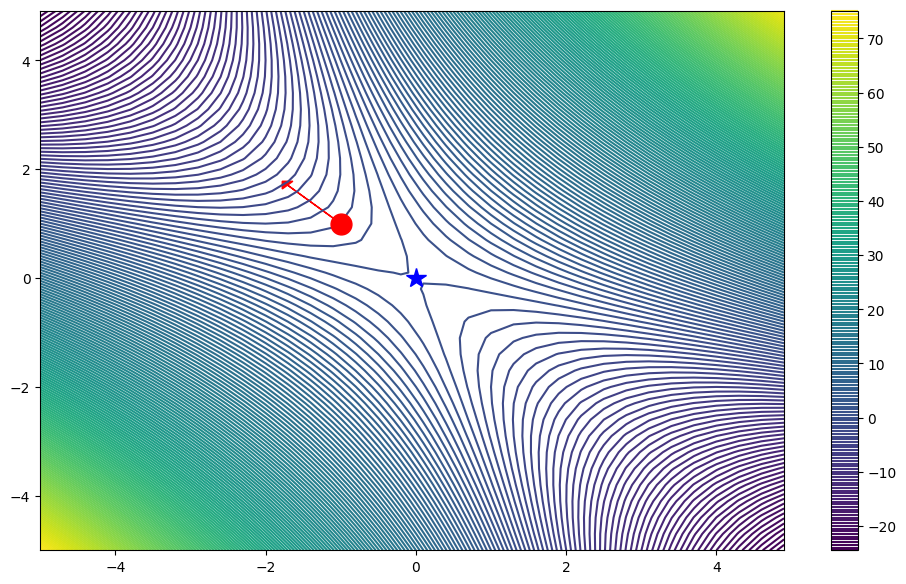

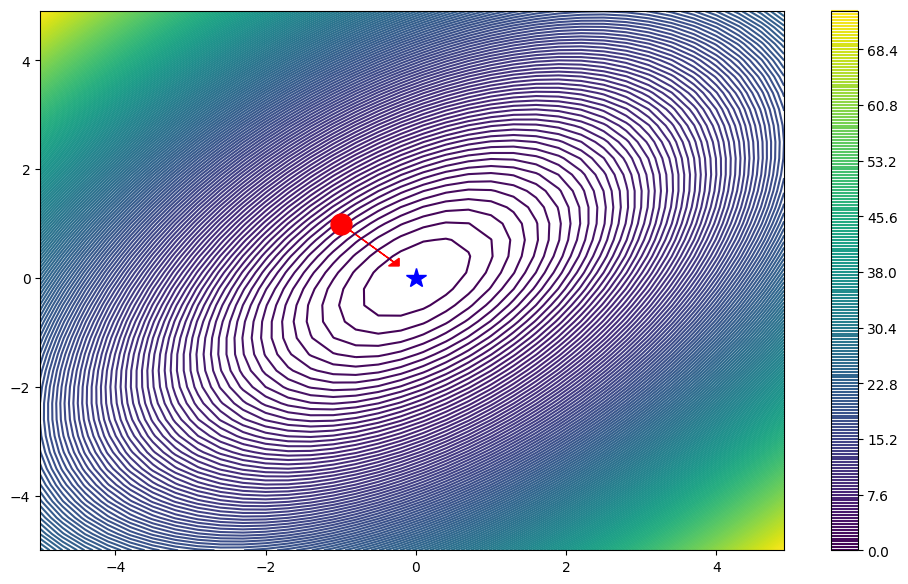

In [51]:
X = np.arange(-5, 5, 0.3)
Y = np.arange(-5, 5, 0.3)
X, Y = np.meshgrid(X, Y)
Z1 = np.array([[q1(np.array([x, y])) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
Z2 = np.array([[q2(np.array([x, y])) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

#try the two starting points
x0=[-1,1]
# x0=[1,1] 
xstar=[0,0]


s=-grad_q1(x0)
ns = np.sqrt(s[0]**2+s[1]**2);
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z1,200)
plt.colorbar()
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')
plt.arrow(x0[0],x0[1],s[0]/ns,s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')
plt.plot([xstar[0]],[xstar[1]],marker='*',markersize=15, color ='b')

s=-grad_q2(x0)
ns = np.sqrt(s[0]**2+s[1]**2);
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z2,200)
plt.colorbar()
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')
plt.arrow(x0[0],x0[1],s[0]/ns,s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')
plt.plot([xstar[0]],[xstar[1]],marker='*',markersize=15, color ='b')




Draw the surface plots for the two functions

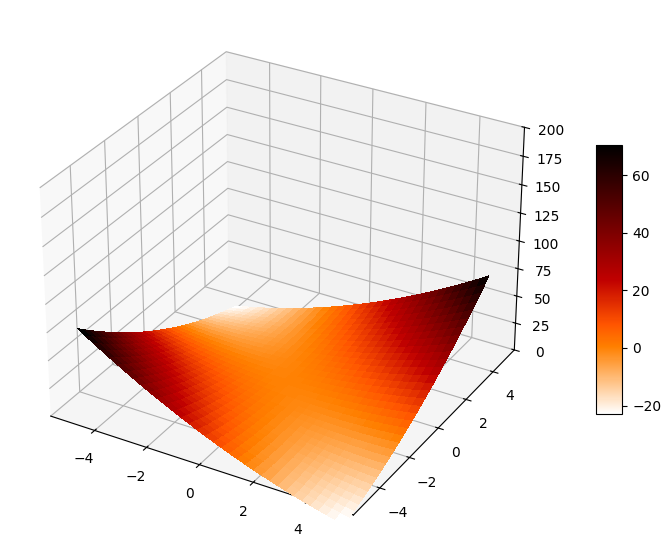

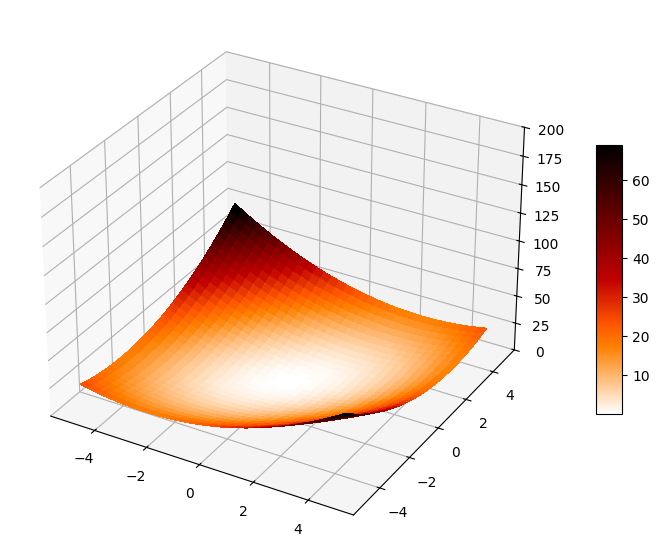

In [55]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

Z = np.array([[q1(np.array([x, y])) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

Z = np.array([[q2(np.array([x, y])) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()